# MINOR PROJECT

# TASK 1 - Exploratory Data Analysis

## Question -1 Are there any missing values and duplicate records in the dataset? If so, how will you handle them?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
breast_cancer=pd.read_csv('Breast_cancer_data.csv')

In [3]:
missing_values=breast_cancer.isnull().sum()

In [4]:
breast_cancer=missing_values.dropna()

In [5]:
missing_values=breast_cancer.isnull().sum()

In [6]:
missing_values

0

##### In the starting there were no missing values but i wrote the command that can be used if there were.I would have droped then and then procedd further.

## Question-2 What is the distribution of the diagnosis variable? Is it a balanced or imbalanced dataset? If the dataset is imbalanced (unequal number of cancerous and non-cancerous cases), how will you address this issue? Can you consider techniques such as oversampling, undersampling, or synthetic data generation?

In [7]:
breast_cancer=pd.read_csv('Breast_cancer_data.csv')

In [8]:
breast_cancer.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [9]:
count=breast_cancer['diagnosis'].value_counts()

In [10]:
count

1    357
0    212
Name: diagnosis, dtype: int64

In [11]:
breast_cancer.shape

(569, 6)

In [12]:
class_proportions = breast_cancer['diagnosis'].value_counts(normalize=True)

In [13]:
class_proportions


1    0.627417
0    0.372583
Name: diagnosis, dtype: float64

##### Yes the code was imbalanced as cancerous were 357 and on the other hand non cancerous were 212 .I chose oversampling technique to overcome the issue.

# oversampling

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
X = breast_cancer.drop('diagnosis', axis=1)
y = breast_cancer['diagnosis']


In [16]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [17]:
class_counts = pd.Series(y_resampled).value_counts()
print(class_counts)

0    357
1    357
Name: diagnosis, dtype: int64


## Question-3 How does the mean area vary with respect to the mean radius? Can you visualize it using a scatter plot? Are there any notable differences in the mean smoothness between cancerous and non-cancerous cases?

In [18]:
mean_radius = breast_cancer['mean_radius']
mean_area = breast_cancer['mean_area']

# Calculate correlation coefficient
correlation_coefficient = mean_radius.corr(mean_area)

print("Correlation coefficient between mean radius and mean area:", correlation_coefficient)

Correlation coefficient between mean radius and mean area: 0.9873571700566127


##### The relation between the mean radius and mean area is close to 1 so they are directly proportional as the radius increases area also increases.

In [19]:
cancerous = breast_cancer[breast_cancer['diagnosis'] == 1]
non_cancerous = breast_cancer[breast_cancer['diagnosis'] == 0]

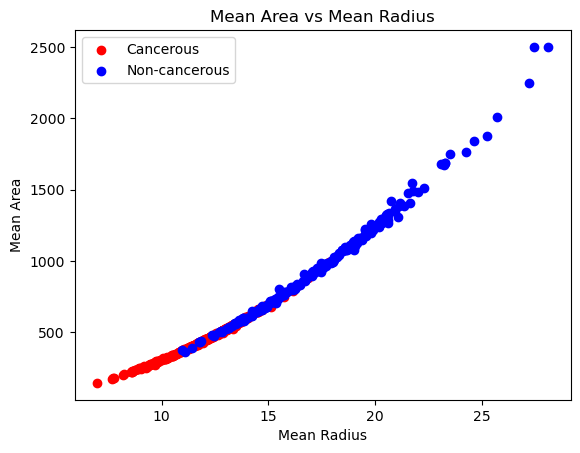

In [20]:
plt.scatter(cancerous['mean_radius'], cancerous['mean_area'], color='red', label='Cancerous')
plt.scatter(non_cancerous['mean_radius'], non_cancerous['mean_area'], color='blue', label='Non-cancerous')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Area')
plt.title('Mean Area vs Mean Radius')
plt.legend()
plt.show()

In [21]:
cancerous_mean_smoothness = cancerous['mean_smoothness']
non_cancerous_mean_smoothness = non_cancerous['mean_smoothness']

print("Cancerous Mean Smoothness:")
print(cancerous_mean_smoothness.describe())



Cancerous Mean Smoothness:
count    357.000000
mean       0.092478
std        0.013446
min        0.052630
25%        0.083060
50%        0.090760
75%        0.100700
max        0.163400
Name: mean_smoothness, dtype: float64


In [22]:
print("\nNon-cancerous Mean Smoothness:")
print(non_cancerous_mean_smoothness.describe())


Non-cancerous Mean Smoothness:
count    212.000000
mean       0.102898
std        0.012608
min        0.073710
25%        0.094010
50%        0.102200
75%        0.110925
max        0.144700
Name: mean_smoothness, dtype: float64


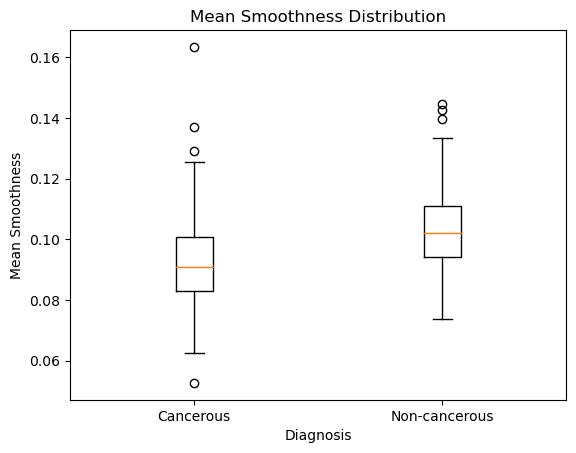

In [23]:
plt.boxplot([cancerous_mean_smoothness, non_cancerous_mean_smoothness], labels=['Cancerous', 'Non-cancerous'])
plt.xlabel('Diagnosis')
plt.ylabel('Mean Smoothness')
plt.title('Mean Smoothness Distribution')
plt.show()

##### Yes there are notable differences in the both outputs the average smoothness tends to be higher for non-cancerous cases compared to cancerous cases, but the difference is smaller in the second output after looking at means of the outputs and there is relatively less variation in mean smoothness among both cancerous and non-cancerous cases in the second output in standard variation.After all mean smoothness can be a potentially informative feature in distinguishing between the two classes.

## Question -4 Are there any categorical variables in the dataset that need to be encoded? How will you handle them?

In [24]:
breast_cancer.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

##### Diagnosis as categorical variable in the dataset

In [25]:
breast_cancer_encoded = pd.get_dummies(breast_cancer, columns=['diagnosis'])



In [26]:

print(breast_cancer_encoded.head())


   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis_0  diagnosis_1  
0            1            0  
1            1            0  
2            1            0  
3            1            0  
4            1            0  


## Question-5 Can you analyse the pairwise correlations between the features? Are there any features that are highly correlated with each other? How might you handle multicollinearity if present?

In [27]:
correlation_matrix = X.corr()


In [28]:
highly_correlated = []
threshold = 0.7 

In [29]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated.append((feature_i, feature_j, correlation_matrix.iloc[i, j]))
            

In [30]:
for features in highly_correlated:
    print("Highly correlated features:", features[0], "and", features[1], "with correlation:", features[2])

Highly correlated features: mean_radius and mean_perimeter with correlation: 0.9978552814938106
Highly correlated features: mean_radius and mean_area with correlation: 0.9873571700566129
Highly correlated features: mean_perimeter and mean_area with correlation: 0.9865068039913908


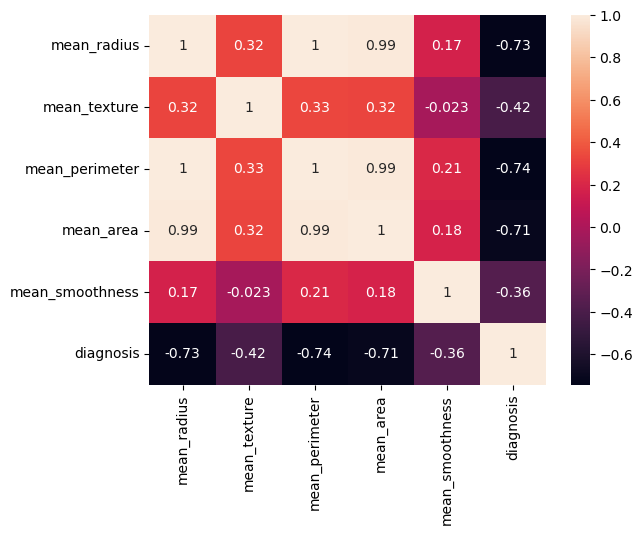

In [31]:
sns.heatmap(breast_cancer.corr(),annot=True) #annnot= True means it will write the numbers inside
plt.show()

##### So, by seeing this we can observe that 'MEAN_RADIUS' and 'MEAN_PERIMETER' are highly correlated. 'MEAN_RADIUS' and 'MEAN_AREA' are highly correlated. 'MEAN_PERIMETER' and 'MEAN_AREA' are highly correlated. we can also visualise the correlation matrix.

##### Multicollinearity is when two or more independent variables in a regression model are highly correlated with each other. So, we can handle them by

##### (1) by dropping any one of the highly correlated variable.

##### (2) by using Partial least square regression or PCA.

# TASK - 2   Classification/Regression

##### Perform following steps on the same dataset which you used for EDA.

##### Data Preprocessing (as per requirement)
##### Feature Engineering
##### Split dataset in train-test (80:20 ratio)
##### Model selection
##### Model training
##### Model evaluation
##### Fine-tune the Model
##### Make predictions
##### Summarize your model's performance by evaluation metrices

In [32]:
# importing requires libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

Step 1: Data processing was done in the EDA task above by checking null and duplicate values.

Step 2: Feature Engineernig was supposed to be done in EDA task where categorical data was checked. Since diagnosis was already in the required format, there were no modifications made. We can also build the following pairplot to understand that diagnosis would be the best suited feature to make the model.

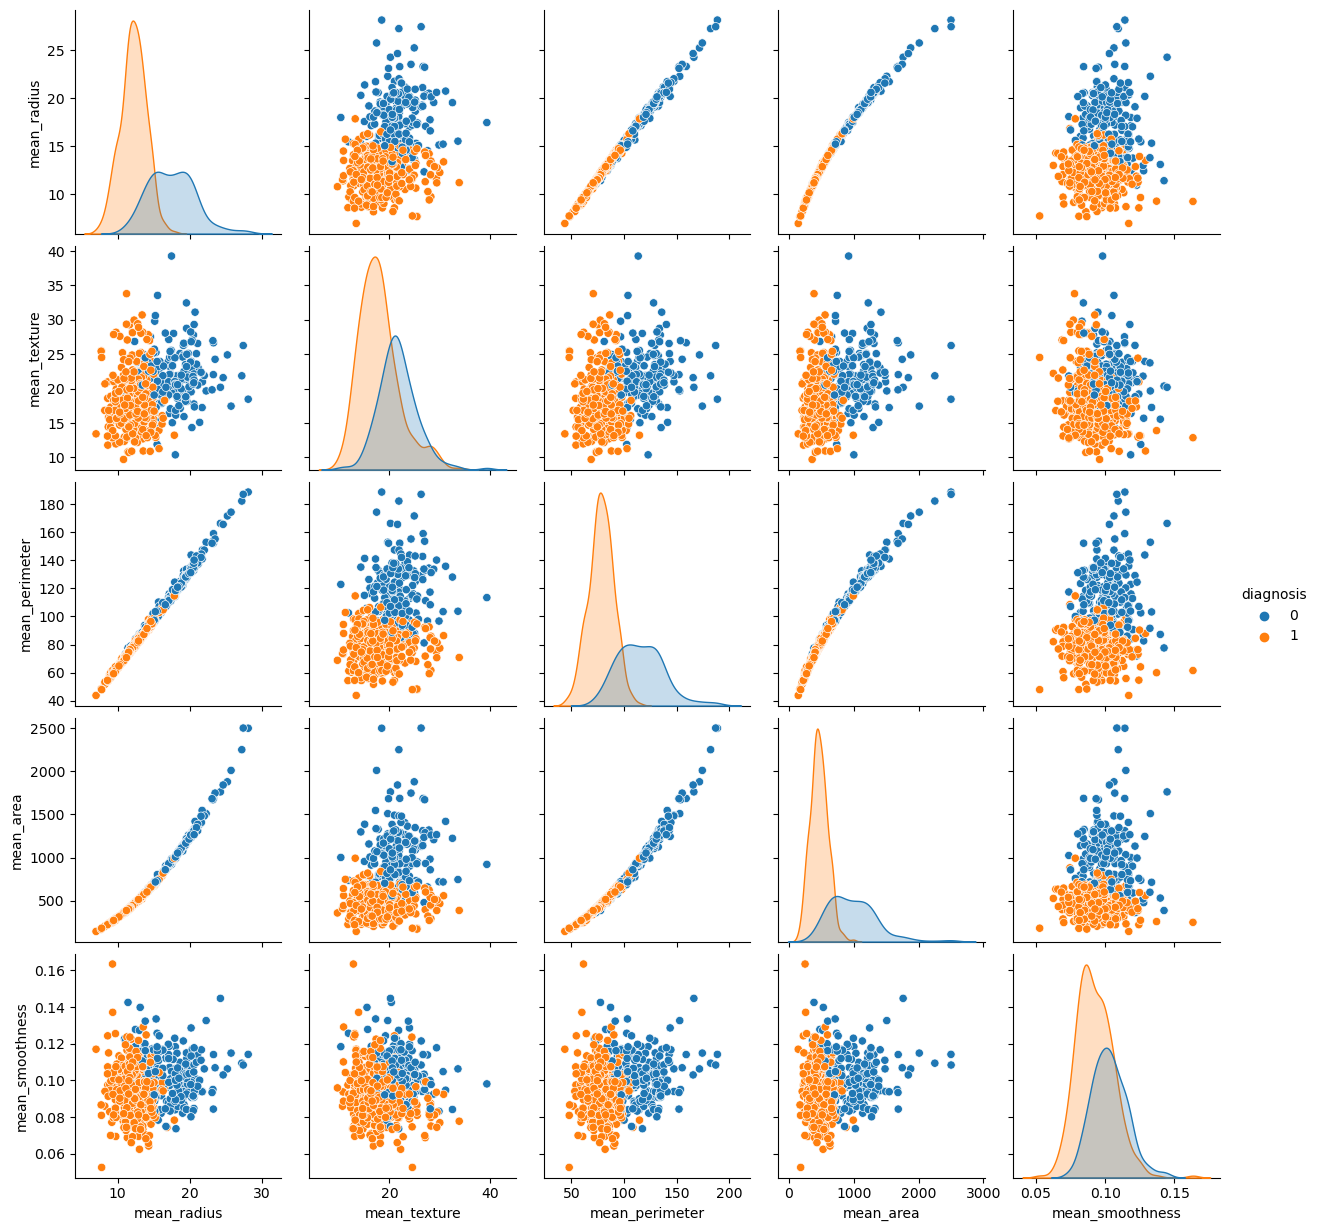

In [33]:
# Plotting a pairplot
sns.pairplot(breast_cancer, hue='diagnosis')
plt.show()

Step 3: Splitting dataset in train-test(80:20 ratio)

In [44]:
# Splitting the dataset
train , test = train_test_split(breast_cancer,test_size=0.1,random_state=36)

In [45]:
# Defining training and testing for x ad y
X_train=train.drop(['diagnosis'],1)
X_test=test.drop(['diagnosis'],1)
Y_train=train['diagnosis']
Y_test=test['diagnosis']

In [46]:
# Checking the shape
X_train.shape, Y_train.shape


((512, 5), (512,))

In [47]:
# Checking the shape
X_test.shape , Y_test.shape

((57, 5), (57,))

Step 4: Considering the dataset used and the columns available, a linear regresion model ahs been chosen.

In [48]:
model = LogisticRegression()

In [49]:
# Training the model using train datasets
model.fit(X_train, Y_train)

LogisticRegression()

Step 5: Evaluating the model on the test dataset.

Step 6: Fine tuning can be done when a new dataset is provided and the model can be trained on it.

In [50]:
# Evaluating the model using test datasets
model.score(X_test,Y_test)


0.9122807017543859

Step 7: Making predictions by using the test dataset

In [51]:
# Making predictions using test dataset
pred = model.predict(X_test)
pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [52]:
# Printing accuracy percentage
acc = metrics.accuracy_score(pred,Y_test)
print('Accuracy of model=',acc*100,'%')

Accuracy of model= 91.22807017543859 %


In [53]:
# Printing error percentage
error = mean_squared_error(pred, Y_test)
print('Mean absolute error of the model=',error*100,'%')

Mean absolute error of the model= 8.771929824561402 %
